# Friends TV-Show 10 Season Transcript Exploratory Analysis

This notebook aims to extract the characteristics of the discourse among the characters across 10 - seasons of the [Friends TV show (1994 - 2004)](https://www.imdb.com/title/tt0108778/).


The aim of the notebook is to extract the word and ngram characteristics of the Friends corpus, the character specific structures and quantitative evaluation of the character, season and episode based distribution of word and dialogs.

The functions used in this notebook are imported from the `friends_utils.py` module. To run the notebook, have the raw data in csv format and the `friends_utils.py` at the same path with the notebook.

In [1]:
import sys
import numpy as np
import pandas as pd
from friends_util import *

[nltk_data] Downloading package omw-1.4 to /home/isil/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/isil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/isil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data
Load the comma separated narrator, discourse, episode and season details for the Friends data.



In [2]:
# load the csv file for the transcript from the original dvs
datapath= "original_friends_transcripts.csv"
seasons, corpus, episodes, data =  load_csv_file(datapath)

# Word Characteristics

### Total Number of Words

In [3]:
words, unique_words = word_characteristics(data)
print(f"The total number of words in ten season of Friends is {len(words)}")
print(f"The total number of unique words in ten season of Friends is {len(unique_words)}")


The total number of words in ten season of Friends is 711496
The total number of unique words in ten season of Friends is 22951


### Distribution of Words Across Seasons

For season 1 the number of words is 65801
For season 2 the number of words is 68735
For season 3 the number of words is 73343
For season 4 the number of words is 68768
For season 5 the number of words is 70797
For season 6 the number of words is 74764
For season 7 the number of words is 72583
For season 8 the number of words is 75240
For season 9 the number of words is 81983
For season 10 the number of words is 59482


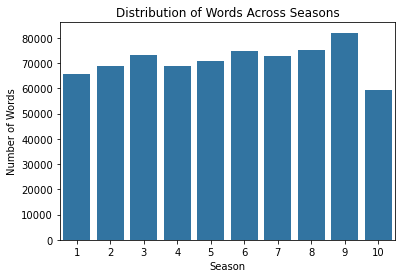

In [4]:
season_word, season_unique_word, freq_splits, unique_res, frequent_word_list, frequency_word_list, outlaws, = word_statistics(data)


season_length = len(season_word)
word_season_counts ={} 
for season in range(1,season_length+1):
  print(f"For season {season} the number of words is {len(season_word[season])}")
  word_season_counts[season] = len(season_word[season])

value = pd.DataFrame({"Season": word_season_counts.keys(), "Words": word_season_counts.values()})

plot_corpus_characteristics(value,
                           title = "Distribution of Words Across Seasons",
                           xlabel=  "Season", 
                           ylabel = "Number of Words",
                           tilt= False, type = "bar"
                           )


For season 1 the number of unique words is 4797
For season 2 the number of unique words is 4947
For season 3 the number of unique words is 5045
For season 4 the number of unique words is 4416
For season 5 the number of unique words is 4415
For season 6 the number of unique words is 4261
For season 7 the number of unique words is 4871
For season 8 the number of unique words is 5049
For season 9 the number of unique words is 5574
For season 10 the number of unique words is 4523


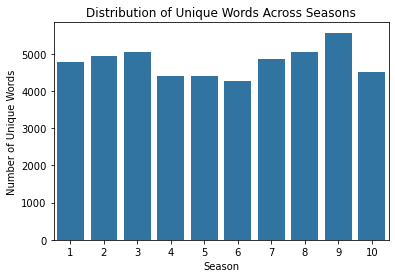

In [5]:
uniqueword_season_counts =  {}
for season in range(1,11):
  print(f"For season {season} the number of unique words is {len(season_unique_word[season])}")
  uniqueword_season_counts[season] = len(season_unique_word[season])

value = pd.DataFrame({"Season": uniqueword_season_counts.keys(), "Words": uniqueword_season_counts.values()})

plot_corpus_characteristics(value,
                           title = "Distribution of Unique Words Across Seasons",
                           xlabel=  "Season", 
                           ylabel = "Number of Unique Words",
                           tilt= False, type = "bar"
                           )

In [6]:
for season in range(1,11):
  print(f"For season {season} the top 10 most frequent words are {freq_splits[season].most_common(10)}")

For season 1 the top 10 most frequent words are [('I', 3122), ('YOU', 2949), ('S', 1612), ('THE', 1365), ('TO', 1325), ('IT', 1279), ('A', 1206), ('THAT', 986), ('AND', 929), ('T', 899)]
For season 2 the top 10 most frequent words are [('I', 3183), ('YOU', 3034), ('S', 1539), ('THE', 1499), ('TO', 1474), ('IT', 1280), ('A', 1201), ('THAT', 1035), ('AND', 966), ('T', 897)]
For season 3 the top 10 most frequent words are [('I', 3567), ('YOU', 3400), ('TO', 1754), ('S', 1685), ('THE', 1526), ('IT', 1455), ('A', 1240), ('THAT', 1169), ('AND', 1020), ('T', 1017)]
For season 4 the top 10 most frequent words are [('I', 3475), ('YOU', 3069), ('TO', 1749), ('THE', 1447), ('S', 1425), ('IT', 1373), ('A', 1212), ('THAT', 1119), ('OH', 1054), ('AND', 1003)]
For season 5 the top 10 most frequent words are [('I', 3663), ('YOU', 3285), ('TO', 1752), ('S', 1491), ('IT', 1437), ('THE', 1316), ('THAT', 1227), ('A', 1142), ('T', 995), ('OH', 948)]
For season 6 the top 10 most frequent words are [('I', 37

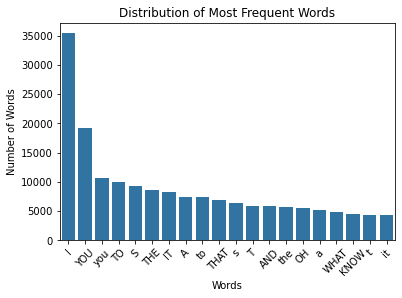

In [7]:
word_frequency = pd.DataFrame({"Words": frequent_word_list, "Frequency": frequency_word_list})
plot_corpus_characteristics(word_frequency,
                           title = "Distribution of Most Frequent Words",
                           xlabel=  "Words", 
                           ylabel = "Number of Words",
                           tilt = True, 
                           type = "bar"
                           )

In [8]:
for season in range(1,11):
    print(f"In season {season}, {len(outlaws)} strings are outlaw words, that is {len(outlaws)/ len(words)} of total")
    print(f"In season {season}, example of outlaw strings are {outlaws}")

In season 1, 141 strings are outlaw words, that is 0.00019817398832881704 of total
In season 1, example of outlaw strings are ['MMM', 'MMM', 'MWAAAHH', 'MWAAAHH', 'BWAAAAA', 'MMM', 'MMM', 'NOOOO', 'MMM', 'MMM', 'HELLOOO', 'SOOO', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'OHHH', 'MMM', 'MMM', 'HELLOOOO', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'OHHH', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'SEEEVER', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'BZZZ', 'AHHH', 'MMM', 'MMM', 'MMM', 'MMM', 'REEE', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'OOOOOOH', 'OOOOOOH', 'OOOOOOH', 'OOOOOOH', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'GIIIFT', 'MONNN', 'MMM', 'MMM', 'MMM', 'AHHHH', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMMSOUP', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', '

In [9]:
print("Across all seasons {} strings are outlaw words, that is {:.2%} of total".format(len(outlaws), len(outlaws)/ len(words)))
print("Across all seasons example of outlaw strings are {}".format(unique_res[:20]))

Across all seasons 141 strings are outlaw words, that is 0.02% of total
Across all seasons example of outlaw strings are ['MMMSOUP' 'BWAAAAA' 'Weeennnerrr' 'Noooooo' 'faaaaaaaaa' 'OOOOOOH' 'mmm'
 'AHHHH' 'mooo' 'III' 'NOOOO' 'REEE' 'MONNN' 'Mmmm' 'sss' 'OHHH' 'faaaaa'
 'MWAAAHH' 'HELLOOO' 'MMM']


# Tokens

In [10]:
tokens_season, tokens_norm, tokens_all, total_number_of_tokens = token_statistics(data)
print(f"The total number of tokens across all season is: {total_number_of_tokens}")

The total number of tokens across all season is: 1063767


Number of tokens in season 1 is: 98749
Number of tokens in season 2 is: 103542
Number of tokens in season 3 is: 109942
Number of tokens in season 4 is: 103060
Number of tokens in season 5 is: 107307
Number of tokens in season 6 is: 110976
Number of tokens in season 7 is: 107760
Number of tokens in season 8 is: 111709
Number of tokens in season 9 is: 121915
Number of tokens in season 10 is: 88807


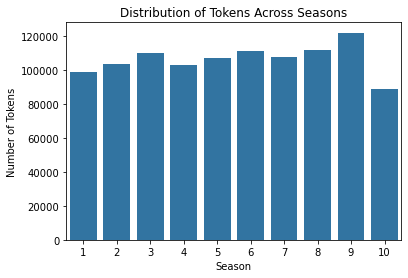

In [11]:
token_season_counts = {}
for season in range(1,11):
    print("Number of tokens in season {} is: {}".format(season, len(tokens_season[season])))
    token_season_counts[season] = len(tokens_season[season])

value = pd.DataFrame({"Season": token_season_counts.keys(), "Words": token_season_counts.values()})

plot_corpus_characteristics(value,
                           title = "Distribution of Tokens Across Seasons",
                           xlabel=  "Season", 
                           ylabel = "Number of Tokens",
                           tilt= False, type = "bar"
                           )
    

The total number of unique tokens across all season is: 98749
The total number of unique tokens across all season is: 103542
The total number of unique tokens across all season is: 109942
The total number of unique tokens across all season is: 103060
The total number of unique tokens across all season is: 107307
The total number of unique tokens across all season is: 110976
The total number of unique tokens across all season is: 107760
The total number of unique tokens across all season is: 111709
The total number of unique tokens across all season is: 121915
The total number of unique tokens across all season is: 88807


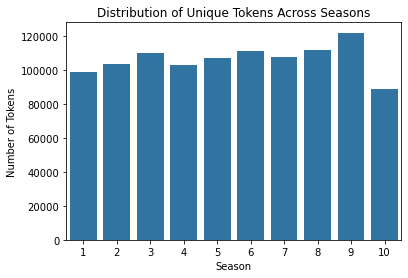

In [12]:
uniquetoken_season_counts = {}
for season in range(1,11):
    print(f"The total number of unique tokens across all season is: {len(tokens_norm[season])}")
    uniquetoken_season_counts[season] = len(tokens_norm[season])

value = pd.DataFrame({"Season": uniquetoken_season_counts.keys(), "Words": uniquetoken_season_counts.values()})

plot_corpus_characteristics(value,
                           title = "Distribution of Unique Tokens Across Seasons",
                           xlabel=  "Season", 
                           ylabel = "Number of Tokens",
                           tilt= False, type = "bar"
                           )
    
    

In [13]:
for season in range(1,3):
  print(f"The 50 tokens in first 3 season are {tokens_season[season][:50]}")
  print(f"The 50 lemmatized tokens in first 3  season are {tokens_norm[season][:50]}")

The 50 tokens in first 3 season are ['▁there', "'", 's', '▁nothing', '▁to', '▁tell', '.', '▁it', "'", 's', '▁just', '▁some', '▁guy', '▁i', '▁work', '▁with', '.', '▁you', "'", 're', '▁going', '▁out', '▁with', '▁him', '.', '▁there', "'", 's', '▁got', '▁to', '▁be', '▁something', '▁wrong', '▁with', '▁him', '.', '▁all', '▁right', ',', '▁jo', 'ey', ',', '▁be', '▁n', 'ice', '.', '▁so', ',', '▁does', '▁he']
The 50 lemmatized tokens in first 3  season are ['▁there', "'", 's', '▁nothing', '▁to', '▁tell', '.', '▁it', "'", 's', '▁just', '▁some', '▁guy', '▁i', '▁work', '▁with', '.', '▁you', "'", 're', '▁going', '▁out', '▁with', '▁him', '.', '▁there', "'", 's', '▁got', '▁to', '▁be', '▁something', '▁wrong', '▁with', '▁him', '.', '▁all', '▁right', ',', '▁jo', 'ey', ',', '▁be', '▁n', 'ice', '.', '▁so', ',', '▁does', '▁he']
The 50 tokens in first 3 season are ['▁this', '▁is', '▁pret', 'ty', '▁much', '▁what', "'", 's', '▁happened', '▁so', '▁far', '.', '▁ross', '▁was', '▁in', '▁love', '▁with', '▁ra', 'che

In [14]:
# Create list of token lengths for each token
for season in range(1,11):
  token_length = [len(t) for t in tokens_season[season]]
  print(f"Average number of characters per token in season {season} is: {round(np.mean(token_length),4)}")

Average number of characters per token in season 1 is: 3.2147
Average number of characters per token in season 2 is: 3.2042
Average number of characters per token in season 3 is: 3.2173
Average number of characters per token in season 4 is: 3.2178
Average number of characters per token in season 5 is: 3.1898
Average number of characters per token in season 6 is: 3.2428
Average number of characters per token in season 7 is: 3.2532
Average number of characters per token in season 8 is: 3.2149
Average number of characters per token in season 9 is: 3.2444
Average number of characters per token in season 10 is: 3.2262


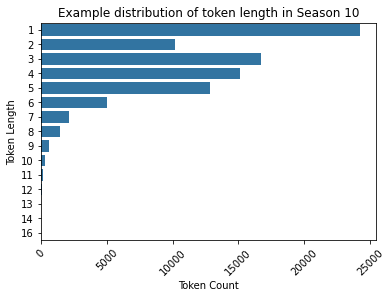

In [15]:
token_length = [len(t) for t in tokens_season[10]]

plot_corpus_characteristics(token_length,
                           title = "Example distribution of token length in Season 10",
                           xlabel=  "Token Count", 
                           ylabel = "Token Length",
                           tilt = True, type= "count"
                           )

Let's find the distribution of the tokens that has character length longer than 10.

In [16]:
# Example distribution of token character length higher than 10 characters for Season 10.
pd.DataFrame(data=token_length, columns=['length']).query("length>10").value_counts()

length
11        119
12         45
13         13
14          3
16          1
Name: count, dtype: int64

Lets find out the rare tokens which has a token length longer than 15 characters. During preprocessing, finding and removing meaningless tokens among these rare tokens is considered as a good practice to avoid having them in the token vectors.

In [17]:
for season in range(1,11):
  print([t for t in  tokens_season[season] if len(t)>=15])


['▁responsibility', '▁responsibility']
['▁responsibility', '▁responsibility']
['▁responsibility', '▁representation']
['▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility', '▁transportation', '▁responsibility']
[]
['▁responsibility', '▁responsibility', '▁responsibility']
['▁responsibility', '▁representative', '▁transportation', '▁responsibility']
[]
['▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility']
['▁internationally']


## Stop Words 
Let's look at the stop words from nltk library

In [18]:
stop_words, freq_stopwords= stopword_statistics(tokens_norm)

print(f"There are {len(stop_words)} stopwords in NLTK library.\n")
print(f"The example stop words in NLTK library are:", stop_words)


There are 179 stopwords in NLTK library.

The example stop words in NLTK library are: {"you'd", 'what', "should've", 'when', 'because', 'their', 'there', 'ma', 'further', 'but', "haven't", 'ours', 'wouldn', "didn't", 'shan', 'if', 'won', "needn't", 'few', "you're", "mightn't", "shan't", 'not', 'i', 'they', 'weren', 'again', 'o', 'mustn', "isn't", "she's", 'such', "it's", 'ourselves', "shouldn't", 'whom', 'who', 'most', 'll', 'y', 're', 'yourselves', 'same', 'isn', 'to', 'themselves', 'myself', 'needn', 'under', 'm', 'against', 'being', 'a', 'your', 'of', 's', 'didn', 'have', 'while', 'herself', 'hasn', "doesn't", 'in', 'were', 'with', "aren't", 'these', 'so', 'why', 'wasn', 'himself', 'hers', 'just', 'shouldn', 'that', 'where', "you'll", 'own', 'and', 'here', "hadn't", 'him', 'was', 'after', 'itself', "weren't", 'the', 'been', 'should', "mustn't", 'no', 'between', 'haven', 'it', "wasn't", "wouldn't", 'above', 'how', 'doing', 'can', 'his', "won't", 'then', 'we', 'very', 'until', 'throug

Stop words can be extended based on the structure of the text. Let's find out what words occur so often in Friends transcripts, besides of the NLTK stopwords, such that could be added to stop words?

In [19]:
print("The top ten frequent stopwords of season {} are".format(season))
print(freq_stopwords[:10])

The top ten frequent stopwords of season 10 are
[('s', 1438), ('t', 900), ('m', 552), ('y', 484), ('re', 456), ('be', 223), ('ll', 179), ('i', 144), ('ve', 115), ('ma', 104)]


Let's find out what is the proportion of the stopwords in our text per season.

In [20]:
for season in range(1,11):
  n_stopwords = len([t for t in tokens_norm[season] if t in stop_words])
  print(f"{n_stopwords} tokens are stop words out of {len(tokens_norm[season])} tokens in season {season}.")
  print(f"That is {round(100*n_stopwords/len(tokens_norm[season]),2)}%.")

5861 tokens are stop words out of 98749 tokens in season 1.
That is 5.94%.
5939 tokens are stop words out of 103542 tokens in season 2.
That is 5.74%.
6310 tokens are stop words out of 109942 tokens in season 3.
That is 5.74%.
5716 tokens are stop words out of 103060 tokens in season 4.
That is 5.55%.
5932 tokens are stop words out of 107307 tokens in season 5.
That is 5.53%.
6230 tokens are stop words out of 110976 tokens in season 6.
That is 5.61%.
6239 tokens are stop words out of 107760 tokens in season 7.
That is 5.79%.
6748 tokens are stop words out of 111709 tokens in season 8.
That is 6.04%.
7162 tokens are stop words out of 121915 tokens in season 9.
That is 5.87%.
5274 tokens are stop words out of 88807 tokens in season 10.
That is 5.94%.


Let's find out how the number of the tokens in the Friends transcripts are affected if we exclude the stop words from the transcripts.

In [21]:
# first clean stop words
tokens_clean = {}
for season in range(1,11):
  tokens_clean[season] = [t for t in tokens_norm[season] if t not in stop_words]
  print(f"Number of tokens for season {season} is: {len(tokens_clean[season])}")

Number of tokens for season 1 is: 92888
Number of tokens for season 2 is: 97603
Number of tokens for season 3 is: 103632
Number of tokens for season 4 is: 97344
Number of tokens for season 5 is: 101375
Number of tokens for season 6 is: 104746
Number of tokens for season 7 is: 101521
Number of tokens for season 8 is: 104961
Number of tokens for season 9 is: 114753
Number of tokens for season 10 is: 83533


# Common n-grams

N-grams constitute simple but yet crucial functionality in processing natural language. It allows models to better capture the contextual information from the text, by helping the model to perform better. 

That is why understanding the n-gram characteristics of Friends text maintains an essential gain in  understanding their role in the model performance. Then let's investigate what are the n-gram properties in the Friends corpus. 

In [22]:
# Get frequent ngrams for all 4
for season in range(1,11):
  keywords = preprocess_text(rslt_df, stop_words)

import matplotlib.pyplot as plt

from collections import defaultdict


def ngram_extractor(text, n_gram, stop_words):
    token = [
        token
        for token in text.lower().split(" ")
        if token != ""
        if token not in stop_words
    ]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row, stop_words):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram, stop_words):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(
        max_row
    )
    temp_df.columns = ["word", "wordcount"]
    return temp_df

rslt_df = data[data['season'] == 3]
mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}

ans_bigram = generate_ngrams(rslt_df["line"], 2, 20, stop_words)

ngram = 2
season = 1
plot_corpus_characteristics(ans_bigram,
                           title = f"{mapping[ngram]}gram Characteristics for Season {season}"
                           xlabel=  "Frequency", 
                           ylabel = "Ngrams",
                           tilt = True, 
                           type = "ngram"
)

print(ans_bigram)
#generate barplot for bigram
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(ans_bigram))

ax.barh(y_pos, ans_bigram["wordcount"])
ax.set_yticks(y_pos, labels=ans_bigram["word"])
ax.invert_yaxis() 
plt.title("Top 20 Bigrams for Answer body")

# plt.figure(figsize=(12,8))
# plt.invert_yaxis()
# plt.barh(ans_bigram["word"], ans_bigram["wordcount"])
# plt.xlabel("Word Count", fontsize=15)
# plt.ylabel("Bigrams", fontsize=15)
# plt.xticks(rotation=45)
# plt.title("Top 20 Bigrams for Answer body")
# plt.show()
# print(ans_bigram)

  
  

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1523796634.py, line 41)

In [ ]:

  
  # mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
  # plt.figure(figsize=(6,4))  
  # print(get_frequent_ngram(keywords, i))
  # new_data = get_frequent_ngram(keywords, i)
  # plt.bar(new_data["ngram"], new_data["count"])
  # plt.title(f"Most common {mapping[i]}grams in season {season}");

# plt.figure(figsize=(12,8))
# sns.barplot(ans_unigram["wordcount"],ans_unigram["word"])
# plt.xlabel("Word Count", fontsize=15)
# plt.ylabel("Unigrams", fontsize=15)
# plt.title("Top 20 Unigrams for Answer body")
# plt.show()
  
# # from nltk.util import ngrams

# # Find ngrams per document
# n_grams = list(ngrams(keywords, 1))
# print(n_grams)
# n_grams = list(ngrams(keywords,1))
# # Find frequency of ngrams
# freq_dist = FreqDist(n_grams)
# top_freq = freq_dist.most_common(20)

# print(top_freq)
# print(pd.DataFrame(top_freq, columns=["ngram", "count"]))

# sns.barplot(x="count", y="ngram", data=pd.DataFrame(top_freq, columns=["ngram", "count"]))

# for i in range(1,5):
#   mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
#   plt.figure(figsize=(6,4))
#   sns.barplot(x="count", y="ngram", value=get_frequent_ngram(keywords, i))
#   plt.title(f"Most common {mapping[i]}grams in season {season}");

 
  # plot_corpus_characteristics(token_length,
  #                          title = "Example distribution of token length in Season 10",
  #                          xlabel=  "Token Count", 
  #                          ylabel = "Token Length",
  #                          tilt = True, type= "count"
  #                          )
  

  # for i in range(1,5):
  #   mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
  #   plt.figure(figsize=(6,4))
  #   sns.barplot(x="count", y="ngram", data=get_frequent_ngram(keywords, i))
  #   plt.title(f"Most common {mapping[i]}grams in season {season}");

# The number of Utterances

In [ ]:
print("The total number of lines in ten season of Friends is {}".format(len(corpus)))

# The Utterances per season

In [ ]:
countS = Counter(seasons)
del countS['Season']

vals = list(countS.values())[9:]+list(countS.values())[:9]
keys = list(countS.keys())[9:]+list(countS.keys())[:9]
countS = dict(zip(keys, vals))

lines_per_season = pd.DataFrame({"Season": countS.keys(), "Unique_words": countS.values()})


plot_corpus_characteristics(lines_per_season,
                           title = "Distribution of Line per Season",
                           xlabel=  "Season", 
                           ylabel = "Number of lines",
                           tilt = True, 
                           type = "bar"
)

# Lines per episode


In [ ]:
#lines per episode
countE = Counter(episodes)
lines_per_season = pd.DataFrame({"Season": countE.keys(), "Unique_words": countE.values()})

plot_corpus_characteristics(lines_per_season,
                           title = "Distribution of Line per Episodes",
                           xlabel=  "Episodes", 
                           ylabel = "Number of lines",
                           tilt = True, 
                           type = "bar"
)

## Transcript Collected From the Internet
This dataset contains the set of Friends transcripts from a [Github repository(https://fangj.github.io/friends/) which were curated by the fans. Therefore, these transcripts do not refer to the 100% the original transcripts and might miss some discourse between the characters in the show.

# Character Analysis

In [ ]:
# load the internet found transcript files
datapath = "internet_found_friends_transcript.csv"
seasons, corpus, episodes, narrator = load_csv_file(datapath)

# print the first 5 narrators
print(narrator[:5]) # Shows the first 5 lines of the corpus)

In [ ]:
count = Counter(narrator)
print("{} characters took part in Friends across 10 Seasons".format(len(count.keys())))

In [ ]:
print(narrator.unique())

In [ ]:
# remove characters who talks less than 1000 lines
narrator_count={}

i = 0
for j in count.keys():
    if list(count.values())[i] > 200:
      name = list(count.keys())[i]
      name=re.sub(":","",name)
      name= name.capitalize()
      narrator_count[name] = list(count.values())[i]
    i += 1
#print(narrator_count)

sorted_narrator_count = sorted(narrator_count.items(), key=lambda x:x[1])

print("The characters had higest number of lines in ascending order is:")
print(sorted_narrator_count)

character_lines = {}

for i in sorted_narrator_count:
   character_lines[i[0]] =  i[1]

In [ ]:
lines_per_season = pd.DataFrame({"Narrators": character_lines.keys(), "Narrator_lines": character_lines.values()})


plot_corpus_characteristics(lines_per_season,
                           title = "Distribution of Narrator Lines",
                           xlabel=  "Narrator", 
                           ylabel = "Number of lines",
                           tilt = True, 
                           type = "bar"
)

# Number of Narrators per season

In [ ]:
# Number of characters per season
season_narrator = {}
for season in range(1,11):
    rslt_df = data[data['season'] == season]
    season_narrator[season]= rslt_df.narrator.unique().size

narrator_per_season = pd.DataFrame({"Season": season_narrator.keys(), "Narrator_lines": season_narrator_.values()})


plot_corpus_characteristics(narrator_per_season,
                           title = "Distribution of Narrators per Season",
                           xlabel=  "Season", 
                           ylabel = "Number of Narrators",
                           tilt = True, 
                           type = "bar"
)